In [1]:
 # Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
quizData = pd.read_csv('quizData.csv')

In [4]:
quizData.head()

,X1,X2,X3,X4,Y
0,8.6661,3.62160,-0.44699,-2.8073,Real
1,8.1674,4.54590,-1.46210,-2.4586,Real
2,-2.6383,3.86600,0.10645,1.9242,Real
3,9.5228,3.45660,-3.59440,-4.0112,Real
4,-4.4552,0.32924,-0.98880,4.5718,Real


## Problem 1 a) 

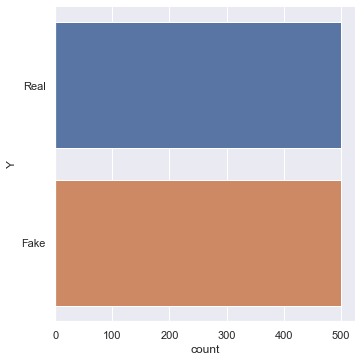

In [5]:
sb.catplot(y = "Y", data = quizData, kind = "count")

In [6]:
countY, countX = quizData.Y.value_counts()
print("Ratio of classes is Y : N = ", countY, ":", countX)

Ratio of classes is Y : N =  500 : 500


Thus, it can be concluded that the response variable "Y" is balanced since the ration of Real:Fake is 1:1

## Problem 1 b)

In [7]:
quizData.describe()

,X1,X2,X3,X4
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.724250,0.170628,-1.224837,1.452808
std,5.938027,2.820315,2.108555,4.462049
min,-13.773100,-7.042100,-8.548200,-5.261300
25%,-1.916200,-1.941250,-2.532775,-1.674350
50%,2.140700,0.119660,-0.620265,0.561365
75%,6.573575,2.460275,0.376710,3.444400
max,12.951600,6.563300,2.449500,17.927400


IndexError: index 4 is out of bounds for axis 0 with size 4

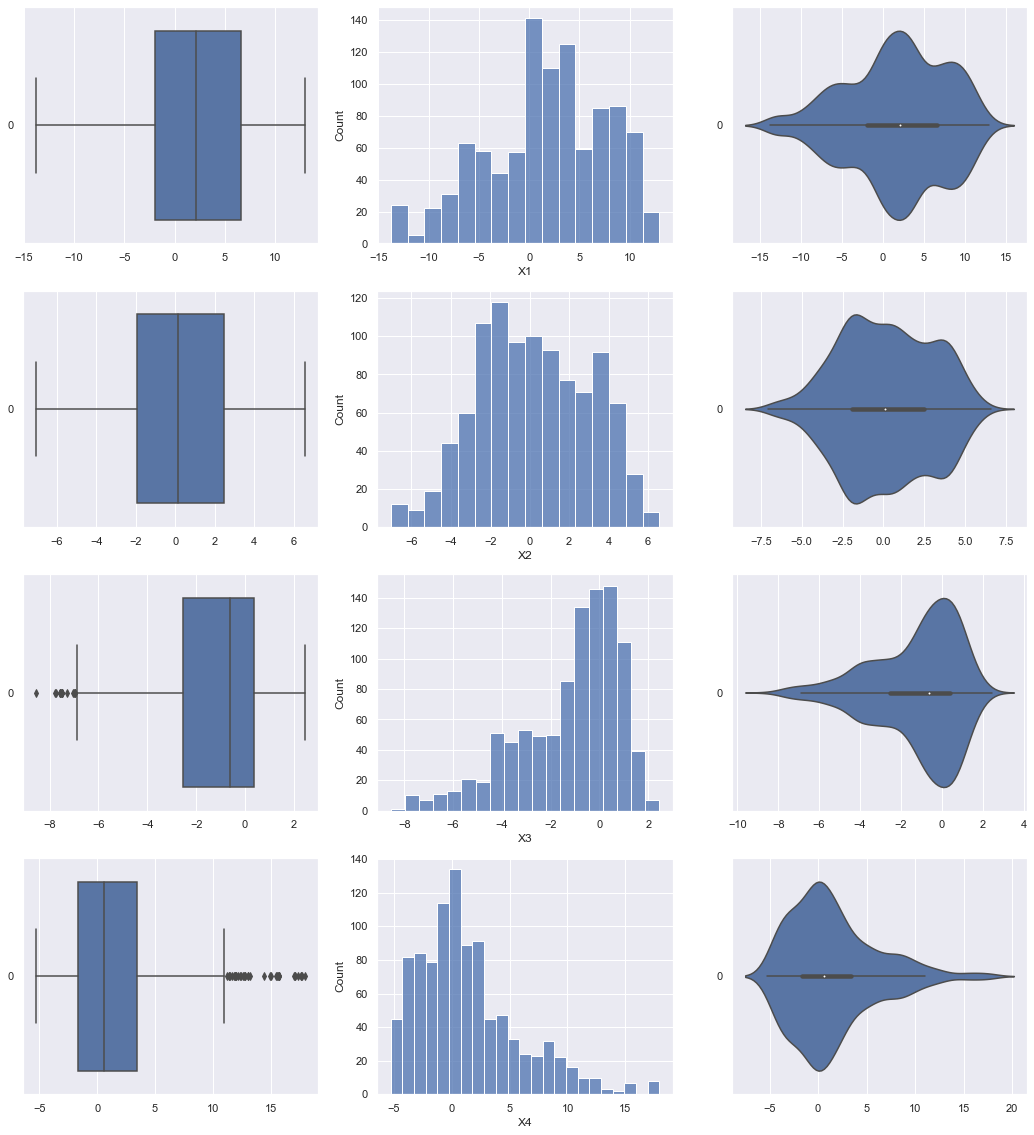

In [11]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 20))

count = 0
for var in quizData:
    sb.boxplot(data = quizData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = quizData[var], ax = axes[count,1])
    sb.violinplot(data = quizData[var], orient = "h", ax = axes[count,2])
    count += 1

## Problem 1 c)

In [14]:
# Calculate the quartiles
Q1 = quizData.quantile(0.25)
Q3 = quizData.quantile(0.75)

# Rule to identify outliers
rule = ((quizData < (Q1 - 1.75 * (Q3 - Q1))) | (quizData > (Q3 + 1.75 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

X1     0
X2     0
X3     3
X4    25
Y      0
dtype: int64

## Problem 2 a)

In [15]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [17]:
# Extract Response and Predictors
y = pd.DataFrame(quizData['Y'])
X = pd.DataFrame(quizData[['X1','X2','X3','X4']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 250)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (750, 4) (750, 1)
Test Set  : (250, 4) (250, 1)


In [23]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Real","Fake"]

SyntaxError: unexpected EOF while parsing (<ipython-input-23-7d4a534d2e05>, line 11)

## Problem 2b) and c)

In [24]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

NameError: name 'dectree' is not defined